# IST 371 Machine Learning

## Chapter 13 homework

### Spring 2019

#### Aidan Polivka

The [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) machine learning dataset contains 60,000 32x32 color images, which fall into ten classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck. There are 6,000 images per class, and the dataset is already divided into 50,000 training images and 10,000 test images. 

For example, here is a sample car image from the dataset: ![CIFAR-10 sample car image](https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile10.png) and a cat: ![CIFAR-10 sample cat image](https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat1.png).

In this homework assignment, you will create a Convolutional Neural Network (CNN) to classify these images. 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
%matplotlib inline

# This code is provided for you. It loads the CIFAR-10 dataset,
# and separates it into training and testing feature and label
# sets. You should not have to modify this cell.
cifar10 = tf.keras.datasets.cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 99s 1us/step


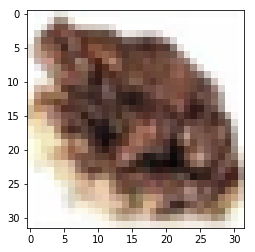

In [4]:
# display a single image from the X_train dataset
image=X_train[125]
plt.imshow(image)
plt.show()

# is this a frog??

In [5]:
# The data does not need to be reshaped, but we should
# convert the X_test and X_train tensors to 32-bit floats
X_train = X_train.reshape(X_train.shape[0], 32, 32,3).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 32, 32,3).astype('float32')


# Scale the feature data to be in [0, 1] instead of [0, 255]
X_train, X_test = X_train / 255.0, X_test / 255.0

In [6]:
# convert the label data (y_train and y_test) to one-hot categorical
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [7]:
# imports for the components
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import models
from tensorflow.keras import optimizers

# clear TensorFlow graph as needed
tf.keras.backend.clear_session()

# Define a CNN for classifying the CIFAR-10 images. NOTE: the number of
# outputs of your first convolutional layer will be based on the image
# size (32x32), and the kernel size you choose. You should also be aware
# that these images are in color, which impacts the input_shape
# parameter to the first convolutional layer. Finally, you are not
# limited to the architecture used in the Chapter 13 code. 
# define the CNN for classifying the MNIST images

model = models.Sequential([
    # input and 1st convolutional layer: 32x32 output, 5x5 kernel
    # with stride 1, elu activation. The images will be zero-padded
    # to be 32x32
    layers.Conv2D(32, kernel_size = (5, 5), strides = (1, 1),
                  activation = 'elu', input_shape = (32, 32, 3)),
    
    # max pooling layer with 2x2 kernel and stride 2
    layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),
    
    # dropout layer to prevent overfitting
    layers.Dropout(0.2),
    
    # 2nd convolutional layer: 64x64 output, 5x5 kernel, stride 1,
    # elu activation
    layers.Conv2D(64, kernel_size = (5, 5), strides = (1, 1), 
                  activation = 'elu'),
    
    # max pooling layer with 2x2 kernel and stride 2
    layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),
    
    # dropout layer to prevent overfitting
    layers.Dropout(0.2),
    
    # Now the non-convolutional part of the CNN
    layers.Flatten(),
    # 10000 node dense hidden layer, elu activation
    layers.Dense(1000, activation = 'elu'),
     
    # dropout layer to prevent overfitting
    layers.Dropout(0.2),
    
   
    # 10 node output layer with softmax activation
    layers.Dense(10, activation = 'softmax')
])






# compile the model
nesterov = optimizers.SGD(lr = 0.01, decay = 1e-6, momentum = 0.9, nesterov = True)
model.compile(loss = losses.categorical_crossentropy,
              optimizer = nesterov,
              metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
# display the structure of the model
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
__________

In [9]:
# copy the checkpointer code from the Chapter 13 demo code
checkpointer = tf.keras.callbacks.ModelCheckpoint(
    filepath = 'best_weights.hdf5',
    monitor = 'val_acc',
    verbose = 1,
    save_best_only = True
)


In [10]:
# train the network; make sure to use the checkpointer created
# in the previous cell
history = model.fit(X_train, y_train,
                    batch_size = 256, # train in batches of 128, 
                                      # so we don't have to store
                                      # all the data in memory at
                                      # one time (optional)
                    epochs = 100,
                    verbose = 1,
                    validation_data = (X_test, y_test),
                    callbacks=[checkpointer]
)


Train on 50000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
49920/50000 [============================>.] - ETA: 0s - loss: 1.8272 - acc: 0.3435
Epoch 00001: val_acc improved from -inf to 0.43360, saving model to best_weights.hdf5
50000/50000 [==============================] - 83s 2ms/sample - loss: 1.8267 - acc: 0.3438 - val_loss: 1.5732 - val_acc: 0.4336
Epoch 2/100
49920/50000 [============================>.] - ETA: 0s - loss: 1.4942 - acc: 0.4668
Epoch 00002: val_acc improved from 0.43360 to 0.48670, saving model to best_weights.hdf5
50000/50000 [==============================] - 79s 2ms/sample - loss: 1.4941 - acc: 0.4668 - val_loss: 1.4196 - val_acc: 0.4867
Epoch 3/100
49920/50000 [============================>.] - ETA: 0s - loss: 1.3641 - acc: 0.5160
Epoch 00003: val_acc improved from 0.48670 to 0.54890, saving model to best_weights.hdf5
50000/50000 [==============================] - 83s 2ms/sample - loss: 1.3640 - acc: 0.5161 - v

In [11]:
# reinitialize the model with the best weights,
# and save the model so we could use it later
model.load_weights('best_weights.hdf5')
model.save('shapes_cnn.h5')


In [12]:
# print out the test loss and test accuracy of your trained model


# see how the model performs on the test data
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])




Test loss: 1.1053327837467193
Test accuracy: 0.7733


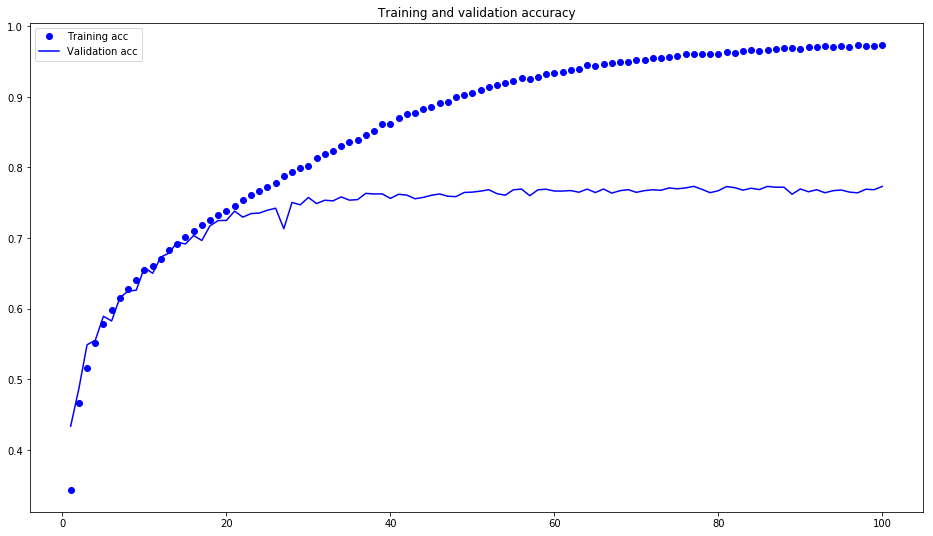

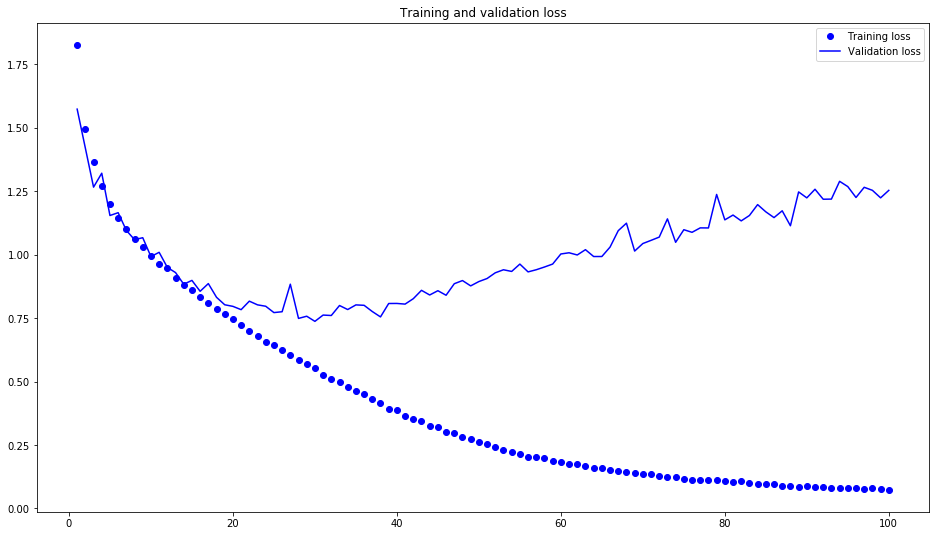

In [13]:
# using code similar to that in the Ch 13 sample, plot the 
# training and validation accuracy and loss curves
# look at the performance of the model 
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.rcParams['figure.figsize'] = (16,9)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
